In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Load data
data = pd.read_excel('VIJ-VIZ-TIR.xlsx', sheet_name=2)

# Assuming 'totalx' is the target variable to be predicted
target_variable = 'totalx'

# Filter data for the relevant months (3, 4, 5)
filtered_data = data[data['month'].isin([3, 4, 5])]

# Select features and target variable
features = ['d2m', 'blh', 'cp', 'cin']
X = filtered_data[features].values
y = filtered_data[target_variable].values.reshape(-1, 1)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for GRU
n_steps = 3
X_gru = np.array([X[i - n_steps:i, :] for i in range(n_steps, len(X))])
y_gru = y[n_steps:]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_gru, y_gru, test_size=0.2, random_state=42)

# Build the GRU model
model = Sequential()
model.add(GRU(128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Save the best model during training
checkpoint = ModelCheckpoint('best_gru_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.2, callbacks=[checkpoint], verbose=1)

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}, Test MAE: {mae:.4f}')

# Save the final model
model.save('final_gru_model.h5')


2024-02-17 10:27:18.501733: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 10:27:18.501869: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 10:27:18.518549: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 10:27:18.573876: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-17 10:27:19.904517: W tensorflow/compiler/tf2

2024-02-17 10:27:21.981024: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 10:27:21.981084: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 10:27:21.988048: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 10:27:21.988119: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 10:27:21.988154: I external/local_xla/xla/stream_executor

Epoch 1/150


2024-02-17 10:27:29.279063: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9509e540c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 10:27:29.279121: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-17 10:27:29.291243: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-17 10:27:29.321393: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708145849.425656   17084 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


34/34 [==============================] - ETA: 0s - loss: 1796.7355 - mae: 42.1293
Epoch 1: val_loss improved from inf to 1648.85229, saving model to best_gru_model.h5
34/34 [==============================] - 4s 34ms/step - loss: 1796.7355 - mae: 42.1293 - val_loss: 1648.8523 - val_mae: 40.2938
Epoch 2/150
 7/34 [=====>........................] - ETA: 0s - loss: 1582.5465 - mae: 39.4836

/home/fitzingout/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - ETA: 0s - loss: 931.4294 - mae: 27.4211
Epoch 2: val_loss improved from 1648.85229 to 407.24759, saving model to best_gru_model.h5
34/34 [==============================] - 1s 27ms/step - loss: 931.4294 - mae: 27.4211 - val_loss: 407.2476 - val_mae: 12.3538
Epoch 3/150
33/34 [============================>.] - ETA: 0s - loss: 116.8972 - mae: 8.2277
Epoch 3: val_loss improved from 407.24759 to 107.27417, saving model to best_gru_model.h5
34/34 [==============================] - 1s 31ms/step - loss: 119.2384 - mae: 8.2118 - val_loss: 107.2742 - val_mae: 7.0321
Epoch 4/150
33/34 [============================>.] - ETA: 0s - loss: 56.3550 - mae: 5.7056
Epoch 4: val_loss improved from 107.27417 to 58.91669, saving model to best_gru_model.h5
34/34 [==============================] - 1s 25ms/step - loss: 56.1756 - mae: 5.7095 - val_loss: 58.9167 - val_mae: 5.4912
Epoch 5/150
33/34 [============================>.] - ETA: 0s - loss: 40.5716 - mae: 4.9037
Epo

In [4]:
# New input data
new_d2m = 296.907
new_blh = 461.283
new_cp = 0.0000363533
new_cin = 202.997

# Assuming you have new input data for the features 'd2m', 'blh', 'cp', and 'cin'
new_input_data = np.array([[new_d2m, new_blh, new_cp, new_cin]])

# Standardize the new input data using the same scaler used for training data
new_input_data_scaled = scaler.transform(new_input_data)

# Reshape the new input data for RNN with 3 time steps
new_input_data_gru = np.array([new_input_data_scaled[0, :]] * n_steps)

# Make predictions with the trained RNN model
predicted_output = model.predict(new_input_data_gru.reshape(1, n_steps, len(features)))

print(f'Predicted Output: {predicted_output[0, 0]}')


1/1 [==============================] - 0s 435ms/step
Predicted Output: 42.687992095947266


22/22 [==============================] - 0s 12ms/step
Mean Squared Error: 20.0339
Mean Absolute Error: 3.4036
R^2: 0.1477


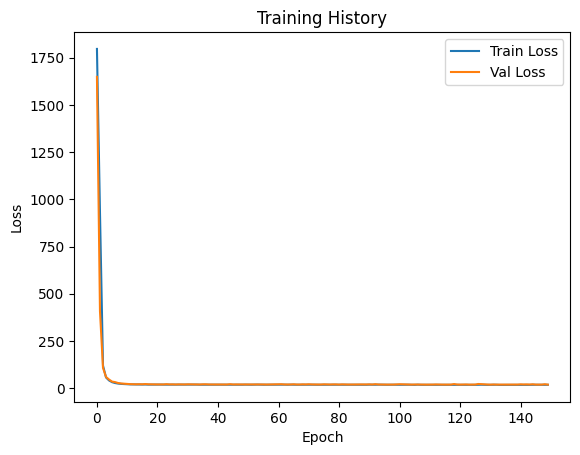

In [5]:
#error calculation
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R^2: {r2:.4f}')


# Plot training history
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [6]:
#now lets make a new excel file and there we will put the predicted values input and the actual values
y_pred = y_pred.flatten()
y_test = y_test.flatten()
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.to_excel('predictedtirupati_GRU.xlsx', index=False)
print(df)


      Actual  Predicted
0    48.3623  47.888760
1    44.3281  43.576290
2    49.8896  41.228317
3    38.9720  42.838203
4    41.1313  43.495186
..       ...        ...
672  47.0852  42.701023
673  37.5029  41.042469
674  41.9176  43.515488
675  44.9952  42.463612
676  43.8867  42.997581

[677 rows x 2 columns]
